# Crime-data(Question - 1)

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("C:\\Users\\Kavya\\Desktop\\DS Assignments\\\ML\\crime_data.csv")

In [46]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [47]:
df.shape

(50, 5)

In [48]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [49]:
list(df)

['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape']

In [50]:
X = df.iloc[:,1:]

In [51]:
import scipy.cluster.hierarchy as shc

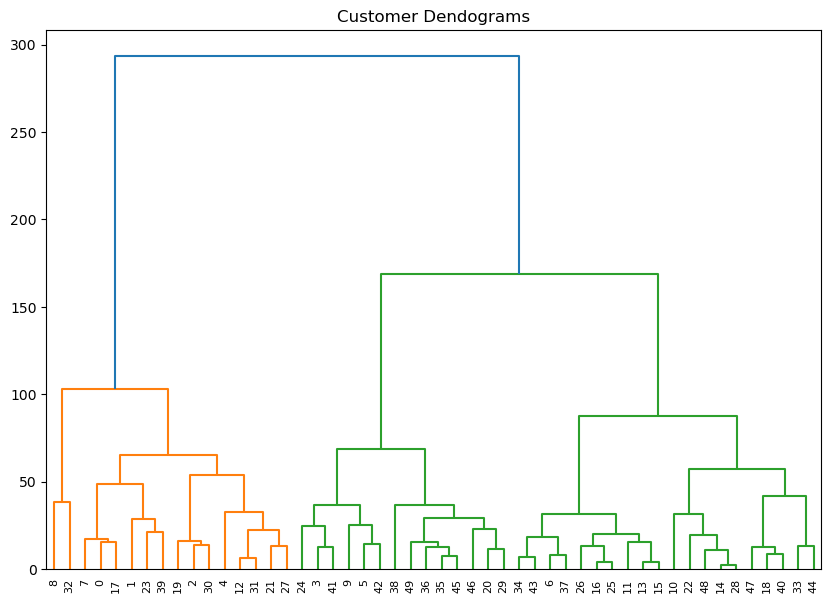

In [52]:
# construction of dendogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method = 'complete'))

In [53]:
# forming a group using cluster
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric ='euclidean', linkage = 'complete')

In [54]:
Y = cluster.fit_predict(X)

In [55]:
Y = pd.DataFrame(Y)

In [56]:
Y.value_counts()

1    20
0    16
2    14
dtype: int64

# K-means

In [356]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters= 3,n_init= 30)

In [357]:
KMeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=30)

In [358]:
Y = KMeans.predict(X)

In [359]:
Y = pd.DataFrame(Y)

In [360]:
Y[0].value_counts()

0    20
1    16
2    14
Name: 0, dtype: int64

In [361]:
KMeans.inertia_

47964.26535714287

In [362]:
inertia = []

In [363]:
from sklearn.cluster import KMeans
for i in range(1,11):
    km = KMeans(n_clusters=i , random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

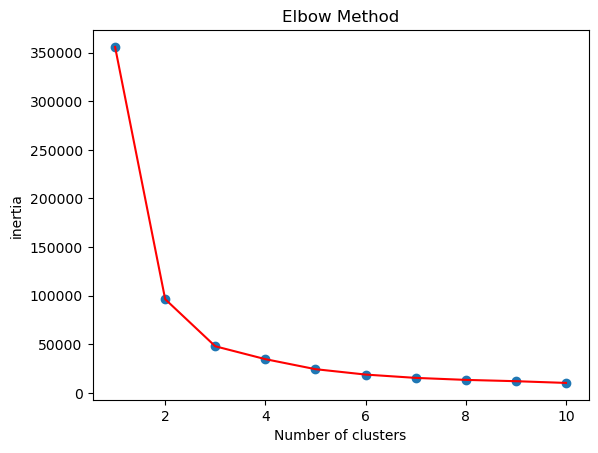

In [364]:
plt.scatter(range(1,11), inertia)
plt.plot(range(1,11), inertia,color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

# DBSCAN

In [57]:
X = df.iloc[:,1:]

In [58]:
X

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [59]:
# Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)

In [60]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [61]:
dbscan = DBSCAN(eps=0.75, min_samples=3)
dbscan.fit(SS_X)

DBSCAN(eps=0.75, min_samples=3)

In [62]:
#Noisy samples are given the label as -1
dbscan.labels_
c1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
print(c1['cluster'].value_counts())

-1    29
 0    15
 1     3
 2     3
Name: cluster, dtype: int64


In [63]:
clustered = pd.concat([df,c1],axis=1)

In [64]:
noisedata = clustered[clustered['cluster']==-1]

In [65]:
noisedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [66]:
finaldata = clustered[clustered['cluster']==0]

In [67]:
finaldata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0


In [68]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 5,n_init=30)
KMeans.fit(finaldata.iloc[:,1:])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=30)

In [69]:
Y = KMeans.predict(finaldata.iloc[:,1:])

In [70]:
Y = pd.DataFrame(Y)

In [71]:
Y[0].value_counts()

4    4
3    4
2    3
1    2
0    2
Name: 0, dtype: int64

# Eastwest Airlines(Question - 2)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\Kavya\\Desktop\\DS Assignments\\ML\\clustering folder\\EastWestAirlines.csv")

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.shape

(3999, 12)

In [6]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
list(df)

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

In [8]:
X = df.iloc[:,1:]
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
import scipy.cluster.hierarchy as sch

In [11]:
from sklearn.preprocessing import normalize
df_norm = pd.DataFrame(normalize(X),columns=X.columns)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


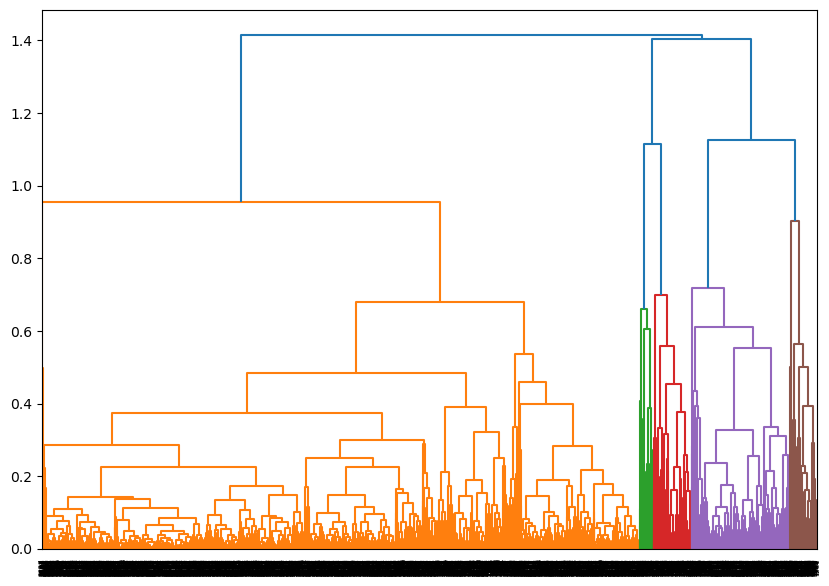

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
dendrograms=sch.dendrogram(sch.linkage(df_norm, 'complete'))

In [14]:
# forming a group using cluster
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, metric ='euclidean', linkage = 'ward')

In [15]:
Y = cluster.fit_predict(X)

In [16]:
Y = pd.DataFrame(Y)

In [17]:
Y.value_counts()

2    2185
4    1030
1     624
3     134
0      26
dtype: int64

# K means

In [29]:
from sklearn.cluster import KMeans

In [30]:
KMeans = KMeans(n_clusters = 5,n_init=30)

In [31]:
KMeans.fit(X)

KMeans(n_clusters=5, n_init=30)

In [32]:
Y = KMeans.predict(X)

In [33]:
Y = pd.DataFrame(Y)

In [34]:
Y[0].value_counts()

0    2502
3    1048
1     342
4      88
2      19
Name: 0, dtype: int64

In [35]:
KMeans.inertia_

5724556335991.398

In [36]:
inertia = []

In [37]:
from sklearn.cluster import KMeans
for i in range(1,11):
    km = KMeans(n_clusters=i , random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

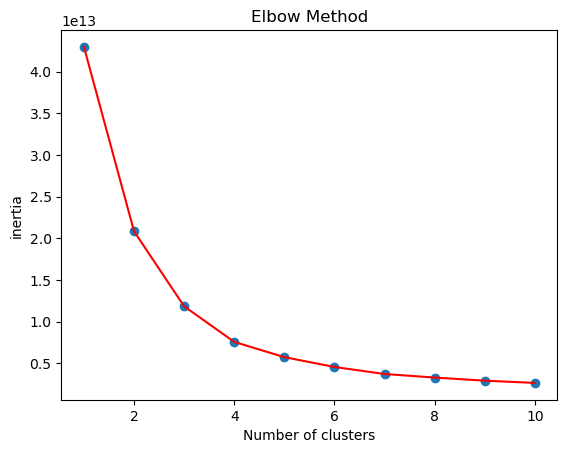

In [27]:
import matplotlib.pyplot as plt
plt.scatter(range(1,11), inertia)
plt.plot(range(1,11), inertia,color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

# DBSCAN

In [79]:
X = df.iloc[:,1:]

In [80]:
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [81]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)

In [82]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [83]:
dbscan = DBSCAN(eps=0.75, min_samples=3)
dbscan.fit(SS_X)

DBSCAN(eps=0.75, min_samples=3)

In [84]:
#Noisy samples are given the label as -1
dbscan.labels_
c1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
print(c1['cluster'].value_counts())

 0     2195
 1      946
-1      741
 2       41
 10      13
 4       12
 14       8
 12       7
 5        5
 9        5
 11       5
 3        4
 13       4
 8        4
 7        3
 6        3
 15       3
Name: cluster, dtype: int64


In [85]:
clustered = pd.concat([df,c1],axis=1)

In [86]:
noisedata = clustered[clustered['cluster']==-1]

In [87]:
noisedata

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3976,59927,739,1,1,1,3100,3,0,0,1464,1,-1
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,-1
3956,3979,47301,1005,1,1,1,4561,4,0,0,1464,0,-1
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [88]:
finaldata = clustered[clustered['cluster']==0]

In [89]:
finaldata

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [90]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 5,n_init=30)
KMeans.fit(finaldata.iloc[:,1:])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=5, n_init=30)

In [91]:
Y = KMeans.predict(finaldata.iloc[:,1:])

In [92]:
Y = pd.DataFrame(Y)

In [93]:
Y[0].value_counts()

3    995
1    575
2    374
0    186
4     65
Name: 0, dtype: int64